In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve

In [2]:
data = pd.read_csv('new_income_evaluation.csv')
data

,Unnamed: 0,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,0,4,12,0,0,0,0,0,38,0,39,77516,2174,0,40
1,1,6,12,1,1,1,0,0,38,0,50,83311,0,0,13
2,2,2,8,4,2,0,0,0,38,0,38,215646,0,0,40
3,3,2,6,1,2,1,1,0,38,0,53,234721,0,0,40
4,4,2,12,1,3,2,1,1,4,0,28,338409,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,32556,2,10,1,10,2,0,1,38,0,27,257302,0,0,38
32534,32557,2,8,1,9,1,0,0,38,1,40,154374,0,0,40
32535,32558,2,8,6,0,4,0,1,38,0,58,151910,0,0,40
32536,32559,2,8,0,0,3,0,0,38,0,22,201490,0,0,20


In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,4,12,0,0,0,0,0,38,0,39,77516,2174,0,40
1,6,12,1,1,1,0,0,38,0,50,83311,0,0,13
2,2,8,4,2,0,0,0,38,0,38,215646,0,0,40
3,2,6,1,2,1,1,0,38,0,53,234721,0,0,40
4,2,12,1,3,2,1,1,4,0,28,338409,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,2,10,1,10,2,0,1,38,0,27,257302,0,0,38
32534,2,8,1,9,1,0,0,38,1,40,154374,0,0,40
32535,2,8,6,0,4,0,1,38,0,58,151910,0,0,40
32536,2,8,0,0,3,0,0,38,0,22,201490,0,0,20


In [4]:
X = data.drop('income', axis=1)
y = data['income']

In [5]:
def shapeInfo(X1, X2, y1, y2):
    data_type = [X1, X2, y1, y2]
    shape = []
    frame = pd.DataFrame(columns=['shape'], index=['X1', 'X2', 'y1', 'y2'])

    for i in range(0, len(data_type)):
        shape.append(data_type[i].shape)

    frame['shape'] = shape

    return frame

In [6]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, stratify=y_temp)

In [8]:
shapeInfo(X_temp, X_test, y_temp, y_test)

,shape
X1,"(27657, 13)"
X2,"(4881, 13)"
y1,"(27657,)"
y2,"(4881,)"


In [9]:
shapeInfo(X_train, X_val, y_train, y_val)

,shape
X1,"(23508, 13)"
X2,"(4149, 13)"
y1,"(23508,)"
y2,"(4149,)"


In [10]:
scaler_m = MinMaxScaler()
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
X_val_norm = X_val.copy()

In [11]:
X_train_norm = pd.DataFrame(scaler_m.fit_transform(X_train_norm), index=X_train_norm.index, columns=X_train_norm.columns)
X_test_norm = pd.DataFrame(scaler_m.fit_transform(X_test_norm), index=X_test_norm.index, columns=X_test_norm.columns)
X_val_norm = pd.DataFrame(scaler_m.transform(X_val_norm), index=X_val_norm.index, columns=X_val_norm.columns)

In [12]:
scaler_s = StandardScaler()
X_train_s = X_train.copy()
X_test_s = X_test.copy()
X_val_s = X_val.copy()

In [13]:
X_train_s = pd.DataFrame(scaler_s.fit_transform(X_train_s), index=X_train_s.index, columns=X_train_s.columns)
X_test_s = pd.DataFrame(scaler_s.fit_transform(X_test_s), index=X_test_s.index, columns=X_test_s.columns)
X_val_s = pd.DataFrame(scaler_s.fit_transform(X_val_s), index=X_val_s.index, columns=X_val_s.columns)

In [14]:
def LogClass(X_train, X_val, X_test, y_train, y_val, y_test):

    log = LogisticRegression(penalty='l2', C=100)

    accuracy = []
    precision = []
    recall = []
    f1 = []
    roc = []

    index = ['X_test', 'X_val']

    data_type = [X_test, X_val]
    target_type = [y_test, y_val]
    columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

    result = pd.DataFrame(columns=columns, index=index)

    for i in range(0, len(data_type)):
        predict = log.fit(X_train, y_train).predict(data_type[i])

        accuracy.append(accuracy_score(target_type[i], predict))
        precision.append(precision_score(target_type[i], predict))
        recall.append(recall_score(target_type[i], predict, average='weighted'))
        f1.append(f1_score(target_type[i], predict, average='weighted'))
        roc.append(roc_auc_score(target_type[i], predict, average='weighted'))

    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1 Score'] = f1
    result['ROC AUC'] = roc

    return result.sort_values('F1 Score', ascending=False)

In [15]:
LogClass(X_train_norm, X_val_norm, X_test_norm, y_train, y_val, y_test)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
X_test,0.827494,0.708229,0.827494,0.815330,0.709918
X_val,0.820439,0.696456,0.820439,0.806068,0.694720


In [16]:
LogClass(X_train_s, X_val_s, X_test_s, y_train, y_val, y_test)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
X_test,0.825241,0.727145,0.825241,0.808868,0.693632
X_val,0.822367,0.711755,0.822367,0.806642,0.692578


In [17]:
model = LogisticRegression(penalty='l2', C=100)
model.fit(X_train_s, y_train)
y_score_prob = model.predict_proba(X_test_s)[:,1]
y_score = model.predict(X_test_s)

In [18]:
y_score

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
y_score_prob

array([0.47627851, 0.44556404, 0.18408537, ..., 0.45282519, 0.32889125,
       0.08091231])

In [20]:
def plot_roc_curve(y_test, y_score_prob):
    false_positive_rate, true_positive_rate, treshold = roc_curve(y_test, y_score_prob)
    print('roc_auc_score: ', roc_auc_score(y_test, y_score_prob))
    plt.plot(false_positive_rate, true_positive_rate, label='ROC Curve')
    plt.xlabel('False positive rate')
    plt.ylabel('true positive rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

roc_auc_score:  0.8518365510846714


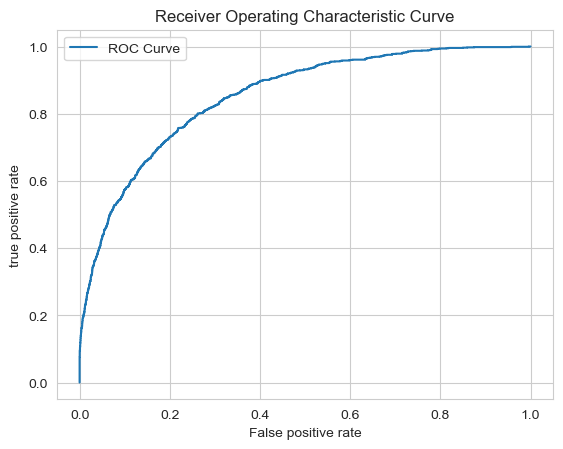

In [21]:
plot_roc_curve(y_test, y_score_prob)

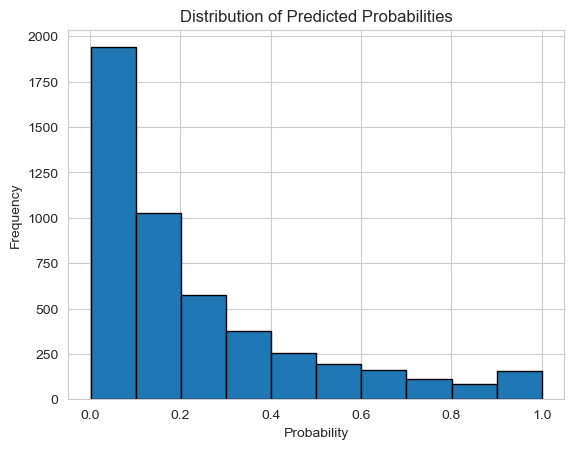

In [22]:
plt.hist(y_score_prob, bins=10, edgecolor='k')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()

In [23]:
model = LogisticRegression(penalty='l2', C=100)
model.fit(X_train_s, y_train)
y_score = model.predict_proba(X_test_s)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
thresholds

array([       inf, 1.        , 0.96921375, ..., 0.00357104, 0.00354247,
       0.00207724])

**Linear Discriminant Analysis**

In [29]:
X = data.drop('income', axis=1).values
y = data['income'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [37]:
model = LogisticRegression(penalty='l2', C=100)
model.fit(X_train_lda, y_train)

LogisticRegression(C=100)

In [38]:
y_pred_lda = model.predict(X_test_lda)

In [39]:
accuracy_score(y_test, y_pred_lda)

0.8100799016594961